# Precio de las Casas en Boston

Trabajaremos con los dataset que vienen en la librería de Scikit-Learn. Entrenaremos modelos de Machine Learning: Regresión lineal simple y multilineal, para predecir el precio de las casas.

In [1]:
#Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets, linear_model   #aqui se encuentra el dataset y los modelos lineales
from sklearn.metrics import mean_squared_error,  mean_absolute_error  #para calcular el error cuadrático medio y el error absoluto medio
from sklearn.model_selection import train_test_split #para separar datos de entrenamiento y de prueba
from sklearn.preprocessing import PolynomialFeatures #para definir el grado del polinomio en regresión polinomial

## 1. EDA y PREPROCESAMIENTO
- 1.1 Carga y primer vistazo de los datos
- 1.2 Descripción estadística
- 1.3 Visualización de los datos y eliminación de outliers
- 1.4 Análisis Multivariado (Correlaciones y gráficas de dispersión)

## 1.1 Carga y primer vistazo de los datos

In [2]:
#Importamos los datos de la librería Scikit-Learn
boston = datasets.load_boston()

#Buscamos cuales son las llaves del dataset para saber donde consultar la información
print('Llaves del dataset: ', boston.keys())

Llaves del dataset:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
#Descripción del dataset (conocemos el número y la descripción de las columnas, numero de registros, si hay valores nulos, etc. )
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print('Cantidad de datos: ', boston.data.shape)
print('Columnas de datos: ', boston.feature_names)
print('Registros del precios de las casas: ', boston.target.shape)

Cantidad de datos:  (506, 13)
Columnas de datos:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Registros del precios de las casas:  (506,)


In [5]:
#Para una mejor manejo y visualización, lo pasamos a un dataframe
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Información obtenida:
- El dataset se compone de 13 columnas con 506 registros cada una sin valores perdidos por lo que no tendremos que hacer mucho preprocesamiento.
- Tenemos la descripción de cada columna.
- Hay una columna que aparece en DESC pero no está en la data y es la columna MEDV

## 1.2 Descripción estadística

In [6]:
#Tenemos que data-type tiene cada columna y si presenta valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
# Estadísticos de cada columna
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Información obtenida:
- Obtenemos los Dtype de cada columna y corroboramos que no presenta valores nulos.
- Todos los datos son numéricos continuos, salvo la columna Chas, esa es categórica binaria.
- Obtenemos los principales estadísticos de todas las columnas.

## 1.3 Visualización de los datos

Casi todo los datos son numéricos continuos, por lo que ocuparemos histogramas y gráficas de caja y brazo para visualizarlos.

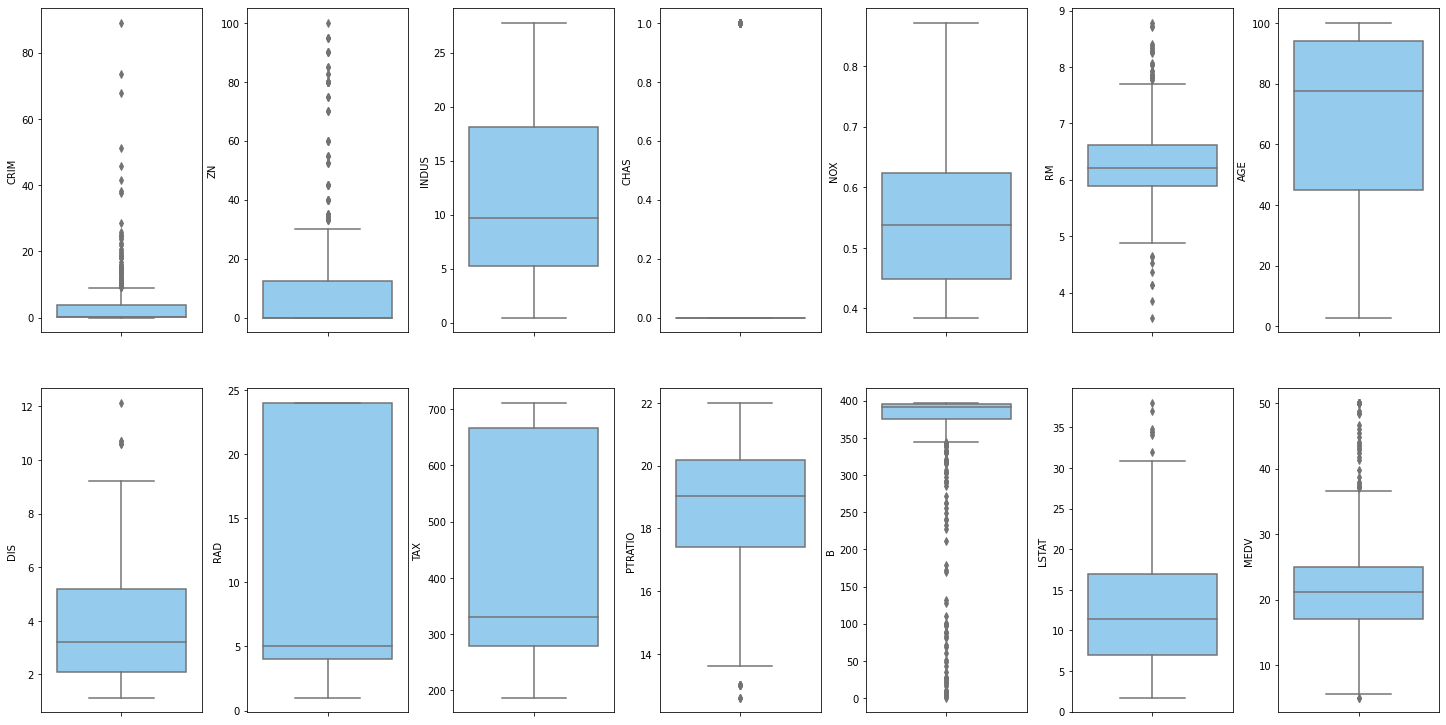

In [8]:
#Gráficas de caja y brazos de las diferentes variables 
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index], color = 'lightskyblue')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

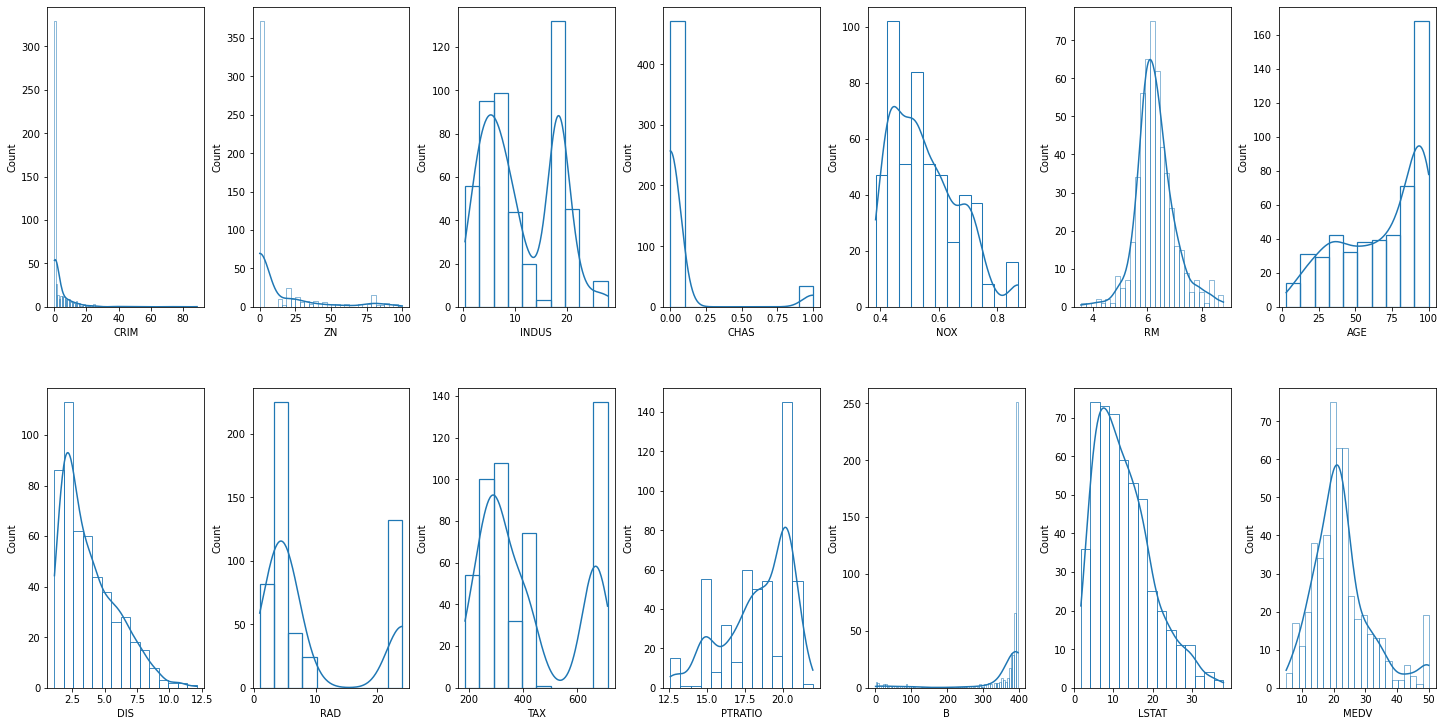

In [9]:
#Histogramas que muestra las distribuciones de los datos
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(x=k, data=df, kde = True, ax=axs[index], fill=False)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Información obtenida:
- De las gráficas de caja y brazos visualizamos que varias categorías presentan outliers (valores extremos), en particular, el precio de las casas MEDV, el cual realizaremos un pequeño preprocesamiento donde nos quedaremos hasta el percentil 95.
- Visualizamos que algunas de las distribucionesson normales, la más evidente es la del promedio de las habitaciones (RM) y el precio de las casa (MEDV). Hay otras distribuciones normales muy sesgadas como la tasa de crimen CRIM, la proporcion de terreno ZN y la proporcion de gente negra B. Otras presentan menor sesgo  como la distancia a centros de trabajo DIS y la proporcion de gente de clase baja LSTAT.

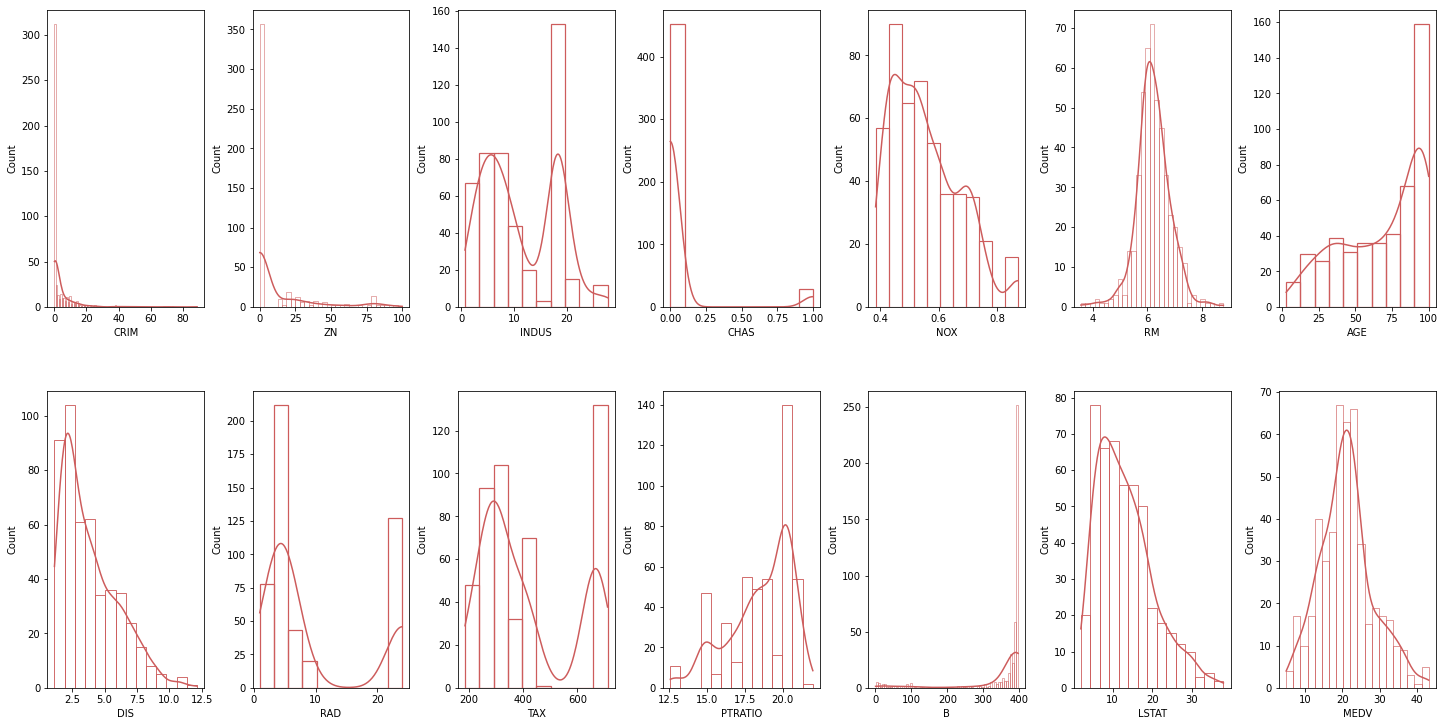

In [10]:
#Creamos un nuevo dataframe que solo incluya  los precios menores al percentil 95 
df_procesado = df.loc[df['MEDV'] <= df['MEDV'].quantile(0.95)]

#Vemos nuevamente las distribuciones
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_procesado.items():
    sns.histplot(x=k, data=df_procesado, kde = True, ax=axs[index], fill=False, color = 'indianred')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Información obtenida:
- La gráfica MEDV presenta una distribución normal más centrada, lo cual será beneficioso para el modelo ya que la regresión lineal requiere que los datos tengan una distribución normal para su mejor entrenamiento.

## 1.4 Análisis Multivariado (Correlaciones)

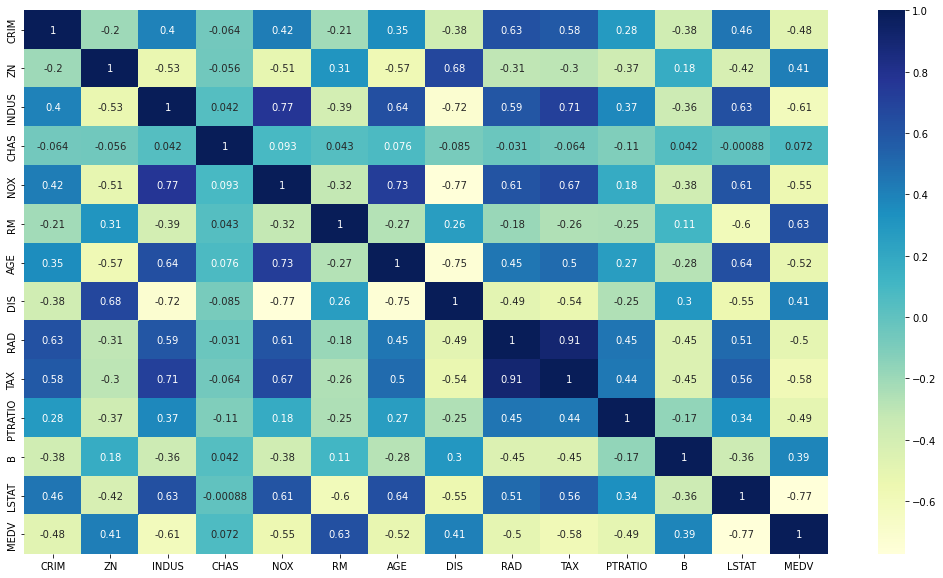

In [11]:
# Matriz de correlacion
fig = plt.figure(figsize = (18,10))
sns.heatmap(df_procesado.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Información obtenida:
- Hay una alta correlación positiva entre el precio y el número de habitaciones RM (0.63).
- Hay una alta correlación negativa entre el precio y el porcentaje de personas con estatus bajo LSTAT (-0.77).
- Hay una correlación negativa entre el precio y la proporcion de tiendas no minoristas o zonas industriales INDUS (-0.61).
- Del resto de categorías, consideramos que su correlación con el precio no es tan relevante.


Realizaremos gráficas de dispersión para visualizar estas correlaciones.

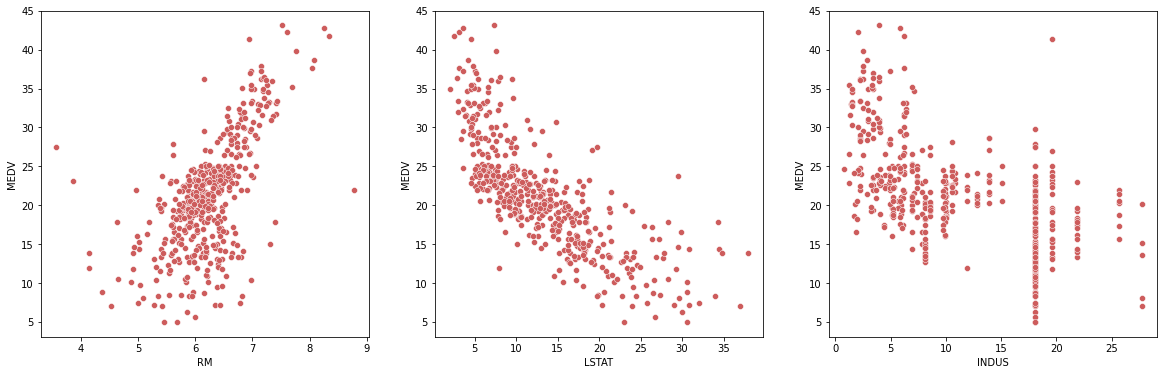

In [12]:
#Gráficas de dispersión
df_disp1 = df_procesado[['RM','LSTAT','INDUS','MEDV']]
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 6))
index = 0
axs = axs.flatten()
for k,v in df_disp1.items():
    if index != 3:
        sns.scatterplot(x=k, y ='MEDV', data=df_disp1, color = 'indianred', ax=axs[index])
        index += 1

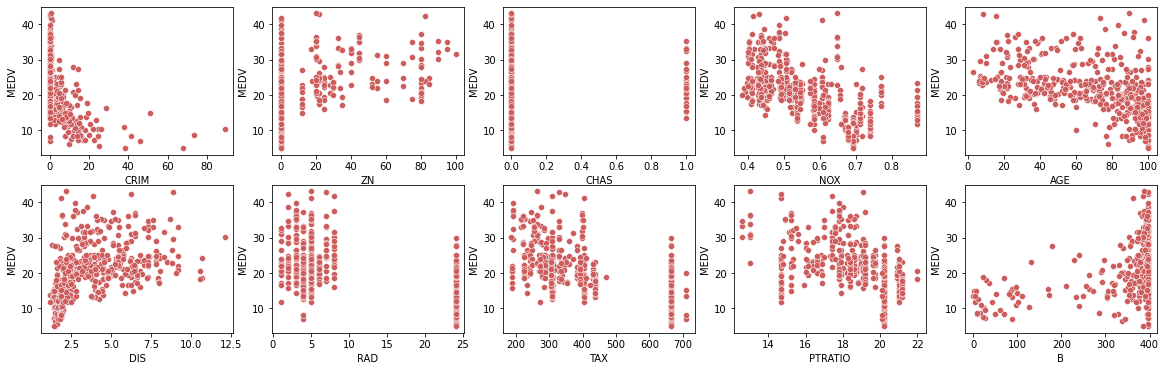

In [13]:
#Observemos la dispersión del resto de las categorías con MEDV
df_disp2 = df_procesado[['CRIM','ZN','CHAS','NOX','AGE','DIS','RAD','TAX','PTRATIO','B','MEDV']]
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 6))
index = 0
axs = axs.flatten()
for k,v in df_disp2.items():
    if index != 10:
        sns.scatterplot(x=k, y ='MEDV', data=df_disp2, color = 'indianred', ax=axs[index])
        index += 1

Información obtenida:
- Al realizar las gráficas de dispersión se pueden visualizar que puede haber tendencias lineales, sobre todo con el número de habitaciones RM y la proporción de gente de clase baje LSTAT por lo que podemos realizar una primera aproximación con una regresión lineal simple o polinomial.

# 2. MODELOS DE MACHINE LEARNING

Pondremos a pruebas diferentes modelos de machine learning para la predicción del precio MEDV:
- 2.1 Regresion Lineal Simple
- 2.2 Regresión Lineal Multiple
- 2.3 Regresión Polinomial
- 2.4 Maquinas de Vectores de Soporte
- 2.5 Arboles de decisión

## 2.1 Regresión Lineal Simple

Este modelo intenta ajustar una ecuación lineal simple de la forma:
$$Y = b + mX$$
Minimizando la función de error MSE:
$$ MSE = \dfrac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n} $$
por medio de mínimos cuadrados.

En base al EDA y al preprocesamiento realizado, hemos adaptado los datos para el correcto entrenamiento de un algoritmo de regresión lineal simple.
Donde las variables dependientes e independientes están altamente correlacionadas, además de que sus datos se distribuyen de forma normal y no presentan demasiados valores extremos que dificulten el aprendizaje del modelo. Para medir el rendimiento del modelo utilizaremos la métrica $R^2$ dado por:

$$ R^2 = 1 - \dfrac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$

Donde $\hat{y}_i$ es el i-ésimo valor predicho y $\bar{y}$ el promedio de los datos verdaderos. EL valor de $R^2$ oscila entre 0 y 1, donde, mientras más cercano esté de 1, mayor precisión tendrá el modelo. 

Y para medir el error utilizaremos la raíz del error cuadrático medio (RMSE) dado por:

$$ RMSE = \sqrt{ \dfrac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 }$$

Y también el error absoluto medio (MAE) dado por:

$$ MAE = \dfrac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$$
Donde, mientras más cercano esté del 0, menor error habrá.

### MEDV vs RM 

In [14]:
# Separamos los datos de entrenamiento y prueba, tomando un 20% de los datos para la prueba
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['RM'].values.reshape(-1,1), 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train1, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
m1_simple = lr.coef_
b1_simple = lr.intercept_
R1_simple = lr.score(X_train1,Y_train1)  # score R^2
Y_pred1_simple = lr.predict(X_test1)  # m1*X + b1
RMSE1_simple = np.sqrt(mean_squared_error(Y_test1, Y_pred1_simple)) # RMSE
MAE1_simple = np.sqrt(mean_absolute_error(Y_test1, Y_pred1_simple)) # MAE

In [15]:
#Resultados del modelo
print(f"La pendiente es: {m1_simple},  y la intersección es: {b1_simple}")
print()
print(f"La precisión del modelo R^2: {R1_simple}")
print()
print(f"El error RMSE: {RMSE1_simple}")
print()
print(f"El error MAE: {MAE1_simple}")

La pendiente es: [7.28621468],  y la intersección es: -24.07427745148327

La precisión del modelo R^2: 0.3924218662837641

El error RMSE: 5.697278462344312

El error MAE: 2.0915518538539457


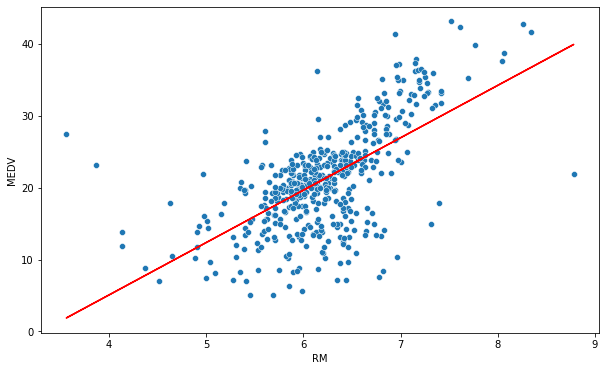

In [16]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'RM', y = 'MEDV')
plt.plot(df_procesado['RM'].values.reshape(-1,1), m1_simple * df_procesado['RM'].values + b1_simple, color = 'r')
plt.show()

### MEDV vs LSTAT

In [17]:
# Modelo sin preprocesamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df['LSTAT'].values.reshape(-1,1), 
                                                        df['MEDV'].values,
                                                        test_size = 0.20)
#Entreno el modelo
lr.fit(X_train2, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
m2_simple = lr.coef_
b2_simple = lr.intercept_
R2_simple = lr.score(X_train2,Y_train2)  #  R^2
Y_pred2_simple = lr.predict(X_test2)  # m2*X + b2
RMSE2_simple = np.sqrt(mean_squared_error(Y_test2, Y_pred2_simple)) # RMSE
MAE2_simple = np.sqrt(mean_absolute_error(Y_test2, Y_pred2_simple)) # MAE

In [18]:
#Resultados del modelo
print(f"La pendiente es: {m2_simple},  y la intersección es: {b2_simple}")
print()
print(f"La precisión del modelo R^2: {R2_simple}")
print()
print(f"El error RMSE: {RMSE2_simple}")
print()
print(f"El error MAE: {MAE2_simple}")

La pendiente es: [-0.98872903],  y la intersección es: 35.065130858326434

La precisión del modelo R^2: 0.5382797224108471

El error RMSE: 6.244229001091107

El error MAE: 2.1348388261058977


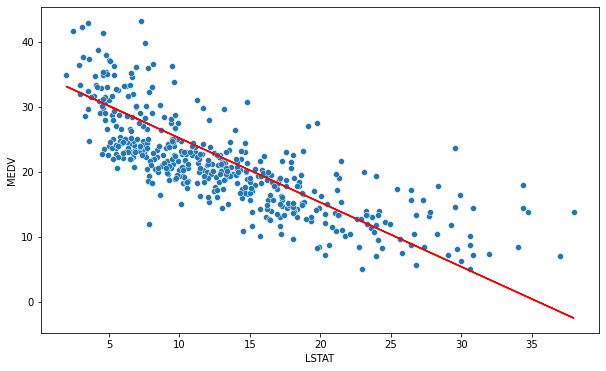

In [19]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'LSTAT', y = 'MEDV')
plt.plot(df_procesado['LSTAT'].values.reshape(-1,1), m2_simple * df_procesado['LSTAT'].values + b2_simple, color = 'r')
plt.show()

Se obtuvo la siguiente información:
- Comparando el rendimiento $R^2$ y los errores $RMSE$ y $MAE$ de ambos entrenamientos, tenemos que la mejor variable para predecir los precios MEDV es la variable LSTAT para este algoritmo. Pero el valor de $R^2$ sigue siendo un valor bajo para considerarlo un buen modelo para estos datos, por lo que la prueba MEDV vs LSTAT se pondrá a prueba con los siguientes modelos en busca de la mejor predicción.

## 2.2 Regresión Lineal Multiple

Este modelo intenta ajustar una ecuación de la forma:
$$ Y = b_0 + b_1 X_1 + b_2 X_2 + \cdots $$
Donde X_i es la i-ésima varable independiente. Para este modelo, las variables independientes deben estar altamente correlacionadas con la variable dependiente, pero no  deben estar correlacionadas entre sí; es decir, que presenten colinealidad. Además, hay que tener cuidado ya que la dificultad del modelo aumenta conforme aumenta el número de variables independientes.

En la matriz de correlaciones, señalamos varias las columnas con mayor correlación con MEDV como: "RM", "LSTAT" e "INDUS". Vemos además que entre "RM" y "LSTAT" hay una correlación  del -0.6 y "LSTAT" e "INDUS" del 0.63. Entre   "RM" y "INDUS" presentan una correlación baja del -0.39.

En base a esto realizaremos dos pruebas, una donde probamos las 3 categorías y otra donde solo probamos con RM y INDUS que presentan una correlación baja. Se utilizaran los mismos criterios de $R^2$ y RMSE para medir el rendimiento y error del modelo.

### MEDV vs RM, LSTAT y INDUS

In [20]:
# Entrenando el modelo con "RM", "LSTAT" y "PTRIATO"
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado[['RM','LSTAT','INDUS']].values, 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train1, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
m1_mul = lr_multiple.coef_  #seran 3 coeficientes
b1_mul = lr_multiple.intercept_
R1_mul = lr_multiple.score(X_train1,Y_train1)  # R^2
Y_pred1_mul = lr_multiple.predict(X_test1) 
RMSE1_mul = np.sqrt(mean_squared_error(Y_test1, Y_pred1_mul)) # RMSE
MAE1_mul = np.sqrt(mean_absolute_error(Y_test1, Y_pred1_mul)) # MAE

In [21]:
#Resultados del modelo
print(f"Los coeficientes son: {m1_mul},  y la intersección es: {b1_mul}")
print()
print(f"La precisión del modelo R^2: {R1_mul}")
print()
print(f"El error RMSE: {RMSE1_mul}")
print()
print(f"El error MAE: {MAE1_mul}")

Los coeficientes son: [ 2.74095676 -0.54225969 -0.18950404],  y la intersección es: 13.375125188868697

La precisión del modelo R^2: 0.6875812208481592

El error RMSE: 4.835201184248743

El error MAE: 1.9428147867069514


### MEDV vs RM y INDUS

In [22]:
# Entrenando el modelo con "RM", "LSTAT" y "PTRIATO"
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_procesado[['RM','INDUS']].values, 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Entreno el modelo
lr_multiple.fit(X_train2, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
m2_mul = lr_multiple.coef_  #seran 2 coeficientes
b2_mul = lr_multiple.intercept_
R2_mul = lr_multiple.score(X_train2,Y_train2)  #  R^2
Y_pred2_mul = lr_multiple.predict(X_test2) 
RMSE2_mul = np.sqrt(mean_squared_error(Y_test2, Y_pred2_mul)) # RMSE
MAE2_mul = np.sqrt(mean_absolute_error(Y_test2, Y_pred2_mul)) # MAE

In [23]:
#Resultados del modelo
print(f"Los coeficientes son: {m2_mul},  y la intersección es: {b2_mul}")
print()
print(f"La precisión del modelo R^2: {R2_mul}")
print()
print(f"El error RMSE: {RMSE2_mul}")
print()
print(f"El error MAE: {MAE2_mul}")

Los coeficientes son: [ 5.22983497 -0.46086745],  y la intersección es: -6.140396694131365

La precisión del modelo R^2: 0.5475901505018934

El error RMSE: 4.3183136255723396

El error MAE: 1.8675727372863469


Se obtuvo la siguiente información:
- Se obtuvo una mejor predicción con las tres categorias juntas que combinando solamente 2, ya que las métrica $R^2$ es mayor y a su vez los errores $RMSE$ y $MAE$ son más bajos. Sin embargo sigue siendo bajo para considerarlo un buen modelo por lo que lo pondremos a prueba con el resto de los modelos.


## 2.3 Regresión Polinomial

Este modelo intenta ajustar una ecuación:
$$ Y = b_0 + b_1X_1 + b_2X_1^2 + ... + c_1X_2 + c_2X_2^2 +...$$
Hay que tener en cuenta que este modelo tiene una tendencia a sobreajustarse si el número del polinomio aumenta por lo que solo nos limitaremos a polinomios de grado 2. Además de que la complejidad de la fórmula aumenta conforme agregamos más variables independientes.

En la sección 1.4 visualizamos algunas gráficas de dispersión con la variable MEDV y dos categorías que podemos probar con este modelo son RM Y LSTAT. El primero debido a que podemos apreciar una curvatura en la parte inferior de los datos, mientras que del segundo apreciamos una curvatura en los extremos de los datos.
Adicional a ello agregaremos un tercero de MEDV vs RM, LSTAT, INDUS para compararlo con el modelo multilineal.

### MEDV VS RM

In [24]:
#definimos los datos de prueba y entrenamiento
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['RM'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)
#se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

#Se transforma las caracteristicas existentes en características de mayor grado
X_train1_poli = poli_reg.fit_transform(X_train1) #distribuimos la variable ind. en X y X^2
X_test1_poli = poli_reg.fit_transform(X_test1)

pr.fit(X_train1_poli, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
m1_pol = pr.coef_  #seran 2 coeficientes
b1_pol = pr.intercept_
R1_pol = pr.score(X_train1_poli,Y_train1)  #  R^2
Y_pred1_pol = pr.predict(X_test1_poli)  # c1*X +c2X^2 + b1
RMSE1_pol = np.sqrt(mean_squared_error(Y_test1, Y_pred1_pol)) # RMSE
MAE1_pol = np.sqrt(mean_absolute_error(Y_test1, Y_pred1_pol)) # MAE

In [25]:
#Resultados del modelo
print(f"Los coeficientes son: {m1_pol},  y la intersección es: {b1_pol}")
print()
print(f"La precisión del modelo R^2: {R1_pol}")
print()
print(f"El error RMSE: {RMSE1_pol}")
print()
print(f"El error MAE: {MAE1_pol}")

Los coeficientes son: [ 0.         -9.24952332  1.36704696],  y la intersección es: 25.143787659645827

La precisión del modelo R^2: 0.4861292275044241

El error RMSE: 5.70275591532615

El error MAE: 2.057967793308275


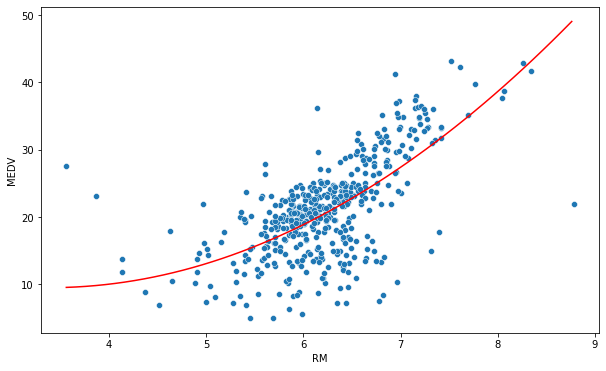

In [26]:
"""
Graficamos con  valores de X dentro del dominio de los datos de RM, 
esto para visualizar en orden como el algoritmo va realizando  la predicción.
"""
X_grid = np.arange(min(df_procesado['RM']),max(df_procesado['RM']),0.1) 
X_grid = X_grid.reshape(len(X_grid),1)

plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'RM', y = 'MEDV')
plt.plot(X_grid, m1_pol[2] * X_grid**2 + m1_pol[1] * X_grid + b1_pol, color = 'r')
plt.show()

### MEDV vs LSTAT

In [27]:
#definimos los datos de prueba y entrenamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_procesado['LSTAT'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Se transforma las caracteristicas existentes en características de mayor grado
X_train2_poli = poli_reg.fit_transform(X_train2) #distribuimos la variable ind. en X y X^2
X_test2_poli = poli_reg.fit_transform(X_test2)

pr.fit(X_train2_poli, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
m2_pol = pr.coef_  #seran 2 coeficientes
b2_pol = pr.intercept_
R2_pol = pr.score(X_train2_poli,Y_train2)  #  R^2
Y_pred2_pol = pr.predict(X_test2_poli)  # c1*X +c2X^2 + b1
RMSE2_pol = np.sqrt(mean_squared_error(Y_test2, Y_pred2_pol)) # RMSE
MAE2_pol = np.sqrt(mean_absolute_error(Y_test2, Y_pred2_pol)) # MAE

In [28]:
#Resultados del modelo
print(f"Los coeficientes son: {m2_pol},  y la intersección es: {b2_pol}")
print()
print(f"La precisión del modelo R^2: {R2_pol}")
print()
print(f"El error RMSE: {RMSE2_pol}")
print()
print(f"El error MAE: {MAE2_pol}")

Los coeficientes son: [ 0.         -1.69685896  0.0281122 ],  y la intersección es: 37.08516936970186

La precisión del modelo R^2: 0.6588197211752749

El error RMSE: 4.001157080064196

El error MAE: 1.744583063768839


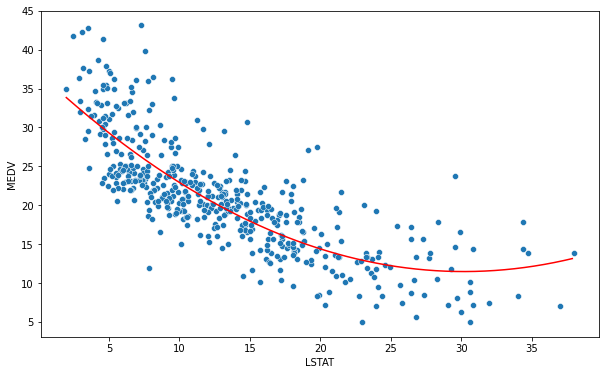

In [29]:
"""
Graficamos con  valores de X dentro del dominio de los datos de RM, 
esto para visualizar en orden como el algoritmo va realizando  la predicción.
"""
X_grid = np.arange(min(df_procesado['LSTAT']),max(df_procesado['LSTAT']),0.1) 
X_grid = X_grid.reshape(len(X_grid),1)

plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'LSTAT', y = 'MEDV')
plt.plot(X_grid, m2_pol[2] * X_grid**2 + m2_pol[1] * X_grid + b2_pol, color = 'r')
plt.show()

### MEDV vs RM, LSTAT, INDUS

In [30]:
#definimos los datos de prueba y entrenamiento
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df_procesado[['RM','LSTAT','INDUS']].values,
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)
poli_reg = PolynomialFeatures(degree = 2)

#Se transforma las caracteristicas existentes en características de mayor grado
X_train3_poli = poli_reg.fit_transform(X_train3) #distribuimos la variable ind. en X y X^2
X_test3_poli = poli_reg.fit_transform(X_test3)

pr.fit(X_train3_poli, Y_train3)

#Obtengo los coeficientes y errores de la prediccion
R3_pol = pr.score(X_train3_poli,Y_train3)  #  R^2
Y_pred3_pol = pr.predict(X_test3_poli)  
RMSE3_pol = np.sqrt(mean_squared_error(Y_test3, Y_pred3_pol)) # RMSE
MAE3_pol = np.sqrt(mean_absolute_error(Y_test3, Y_pred3_pol)) # MAE

In [31]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R3_pol}")
print()
print(f"El error RMSE: {RMSE3_pol}")
print()
print(f"El error MAE: {MAE3_pol}")

La precisión del modelo R^2: 0.7832462290189617

El error RMSE: 3.3709254839079295

El error MAE: 1.5928241623720807


Se obtuvo la siguiente información:
- Obtenemos una mejor predicción con la variable LSTAT dadas las métricas $R^2, RMSE,MAE$.
- Para el entrenamiento con las tres categorías, tenemos un modelo más eficiente que el  multilineal ya que la métrica $R^2$ es más grande mientras que las de error son más pequeñas.

## 2.4 Maquina de Vectores de Soporte (Regresión)

Dado un conjunto de datos, se obtiene un hiperplano (una curva para el caso de dos dimensiones, un plano para 3d, un hiperplano para dimesiones mayores) que se ajuste al comportamiento de los datos como en la regresión lineal y polinomial. La fórmula de este hiperplano está dado por:

$$ Y = \bar{w} X + b$$

A este hiperplano se le ajustan unas bandas que son llamadas vectores de soporte, que se encuentran a una distancia $\epsilon$ y que tratarán de contener la mayoría de los puntos del modelo como se muestra en la siguiente imagen:

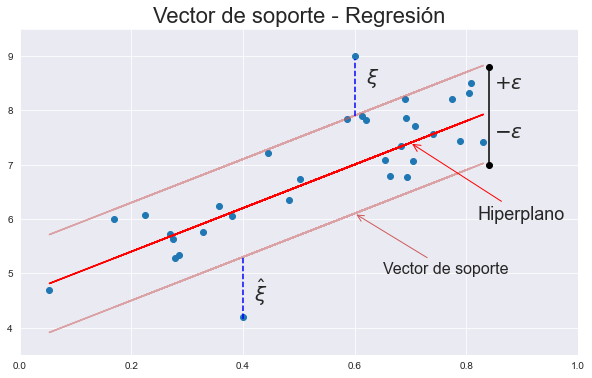

A los puntos fuera de las bandas conformarán los errores y se medirá la distancia $\xi$ o $\hat{\xi}$ con respecto a la banda más cercana. El algoritmo tratará de minimizar la siguiente función de error:

$$ \dfrac{1}{2} ||\bar{w}||^2 + C \sum_{i=1}^n (\xi_i + \hat{\xi_i})$$

Donde C es una constante que determina el equilibrio entre el ancho de las bandas y la cantidad de error que toleramos, mientras más grande sea C, más pequeña será la distancias  de las bandas con el hiperplano y mientras más pequeño sea C, más grande será la distancia de las bandas al hiperplano. 



Para este algoritmo, crearemos un algoritmo de regresión lineal (MEDV vs RM) y uno no lineal (MEDV vs LSTAT). Para evaluar el rendimiento del algoritmo utilizaremos la estadística $R^2$.

### MEDV vs RM

In [32]:
#importamos la paquetería que contiene el algoritmo SVM
from sklearn.svm import SVR

#definimos los datos de prueba y entrenamiento
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['RM'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
svr_lin = SVR(kernel = 'linear', C=1.0, epsilon = 0.2)  # kernel = 'linear' especifica que realizará una regresión lineal
                                                    # C nos apoya con la regularidad de la función y el error que se va a tolerar
                                                    # epsilon infiere en el ancho de las bandas y también controla el error
        
#Entrenamos el modelo
svr_lin.fit(X_train1, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
m1_svr = svr_lin.coef_  #seran 2 coeficientes
b1_svr = svr_lin.intercept_
R1_svr = svr_lin.score(X_train1,Y_train1)  #  R^2
Y_pred1_svr = svr_lin.predict(X_test1)  # m1*X  + b1
RMSE1_svr = np.sqrt(mean_squared_error(Y_test1, Y_pred1_svr)) # RMSE
MAE1_svr = np.sqrt(mean_absolute_error(Y_test1, Y_pred1_svr)) # MAE

In [33]:
#Resultados del modelo
print(f"Los coeficientes son: {m1_svr},  y la intersección es: {b1_svr}")
print()
print(f"La precisión del modelo R^2: {R1_svr}")
print()
print(f"El error RMSE: {RMSE1_svr}")
print()
print(f"El error MAE: {MAE1_svr}")

Los coeficientes son: [[8.41232347]],  y la intersección es: [-30.55138776]

La precisión del modelo R^2: 0.36167315285592183

El error RMSE: 5.254585373442194

El error MAE: 1.9848737676002184


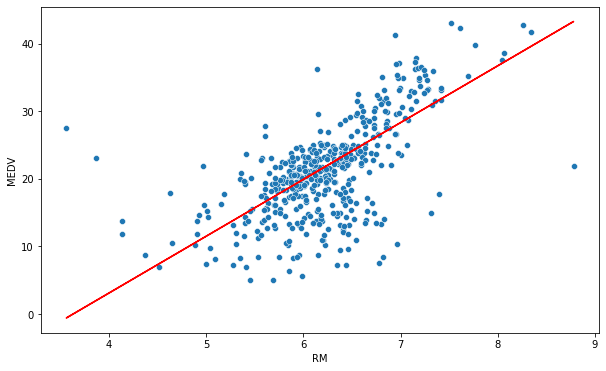

In [34]:
#Graficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'RM', y = 'MEDV')
plt.plot(df_procesado['RM'].values.reshape(-1,1), m1_svr[0] * df_procesado['RM'].values + b1_svr, color = 'r')
plt.show()

### MEDV vs LSTAT

In [35]:
#definimos los datos de prueba y entrenamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_procesado['LSTAT'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
svr_poly = SVR(kernel = 'poly',degree = 2, C=1.0, epsilon = 0.2)  # kernel = 'poly' especifica que realizará una regresión polinomial
                                                    # C nos apoya con la regularidad de la función y el error que se va a tolerar
                                                    # epsilon infiere en el ancho de las bandas y también controla el error
        
#Entrenamos el modelo
svr_poly.fit(X_train2, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
R2_svr = svr_poly.score(X_train2,Y_train2)  #  R^2
Y_pred2_svr = svr_poly.predict(X_test2) 
RMSE2_svr = np.sqrt(mean_squared_error(Y_test2, Y_pred2_svr)) # RMSE
MAE2_svr = np.sqrt(mean_absolute_error(Y_test2, Y_pred2_svr)) # MAE

In [36]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R2_svr}")
print()
print(f"El error RMSE: {RMSE2_svr}")
print()
print(f"El error MAE: {MAE2_svr}")

La precisión del modelo R^2: 0.4190210283104038

El error RMSE: 5.271725843556619

El error MAE: 1.8869777547440578


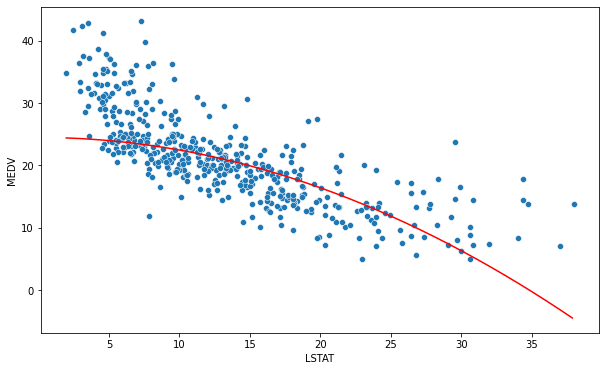

In [37]:
"""
Graficamos con  valores de X dentro del dominio de los datos de RM, 
esto para visualizar en orden como el algoritmo va realizando  la predicción.
"""
X_grid = np.arange(min(df_procesado['LSTAT']),max(df_procesado['LSTAT']),0.1) 
X_grid = X_grid.reshape(len(X_grid),1)

plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'LSTAT', y = 'MEDV')
plt.plot(X_grid, svr_poly.predict(X_grid), color = 'r')
plt.show()

### MEDV vs RM, LSTAT, INDUS

In [38]:
#definimos los datos de prueba y entrenamiento
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df_procesado[['RM','LSTAT','INDUS']].values,
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
svr_poly = SVR(kernel = 'poly',degree = 2, C=1.0, epsilon = 0.2)  # kernel = 'poly' especifica que realizará una regresión polinomial
                                                    # C nos apoya con la regularidad de la función y el error que se va a tolerar
                                                    # epsilon infiere en el ancho de las bandas y también controla el error
        
#Entrenamos el modelo
svr_poly.fit(X_train3, Y_train3)

#Obtengo los coeficientes y errores de la prediccion
R3_svr = svr_poly.score(X_train3,Y_train3)  #  R^2
Y_pred3_svr = svr_poly.predict(X_test3) 
RMSE3_svr = np.sqrt(mean_squared_error(Y_test3, Y_pred3_svr)) # RMSE
MAE3_svr = np.sqrt(mean_absolute_error(Y_test3, Y_pred3_svr)) # MAE

In [39]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R3_svr}")
print()
print(f"El error RMSE: {RMSE3_svr}")
print()
print(f"El error MAE: {MAE3_svr}")

La precisión del modelo R^2: 0.6029637184874382

El error RMSE: 4.4999303866678

El error MAE: 1.7495695267030449


Se obtiene la siguiente información:
- Para el caso de MEDV vs RM se obtienen resultados similares a la regresión lineal, por lo que este conjunto de datos no es muy bueno para este algoritmo.
- Para el caso de MEDV vs LSTAT intentamos un ajuste polinomial ya que pensamos que a los datos se les ajustaría mejor una curva que una línea recta, sin embargo tuvimos mejores resultados en otros modelos.
- Para el caso de MEDV vs RM, LSTAT, INDUS, a pesar de ser un ajuste polinomial, tuvimos resultados menos favorables que el modelo multilineal.
- A diferencia de los otros modelos, ya no tenemos coeficientes que aproximen la curva que mejor ajusta al modelo. 

## 2.5 Arboles de decisión

Los arboles de decisión es un algoritmo compuesto por un arbol jerarquico de condicionales "if-then-else", donde separa la data de entrenamiento original (la raiz del arbol) en dos diferentes subcategorías dependiendo de las caracteristicas o valores de los datos, estas dos subcategorías conformar en primer nodo del arbol. El algoritmo repite este procedimiento de separar los datos de cada subcategoría en dos conjuntos diferente, teniendo así, 4 subcategorías en total, que conforman el 3er nodo. En el caso de Regresión, este proceso lo repite hasta que los valores Y de los datos de entrenamiento son tan cercanos entre sí, separando los valores independientes X en diferentes subcategorías. A continuación una imagen de como luce la separación de los datos por este algoritmo, con 2 (izquierda) y 3 (derecha) nodos de profundidad:


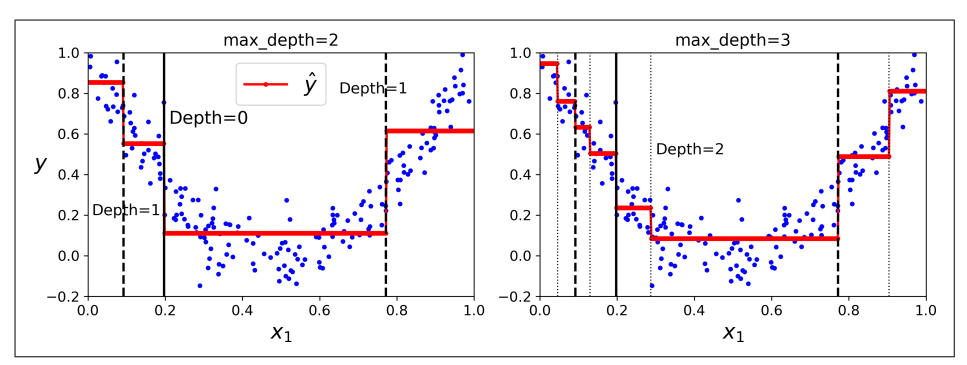
Imagen tomada de: Aurélien Géron. "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow". (2019). O’Reilly Media, Inc. Pag. 187


En caso de que haya demasiados nodos, el modelo puede correr el riesgo de sobreajuste por lo que es normal que el programador escoga la profundidad del arbol. A continuación una imagen de como luce la separación de datos si no se restringe el número de nodos (izquierda) y cuando se escoge una profundidad de 10 (derecha):

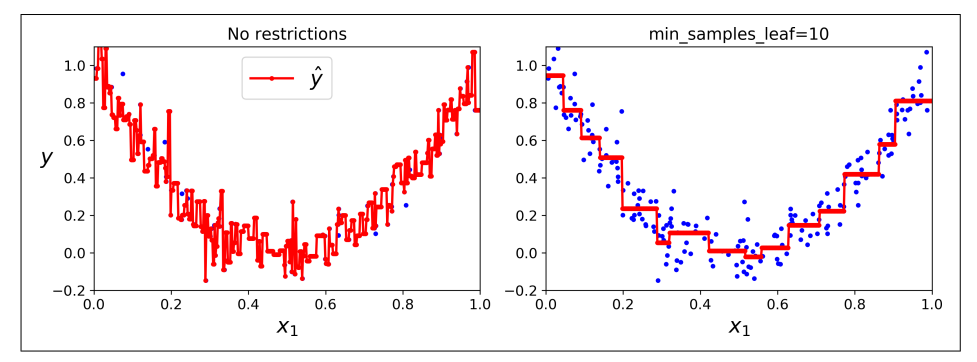
Imagen tomada de: Aurélien Géron. "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow". (2019). O’Reilly Media, Inc. Pag. 187



En contraste con la regresión lineal, los arboles de decisión tienen la habilidad de descubrir patrones escondidos correspondientes a interaccciones complejas en la data. Es por ello que realizaremos las mismas pruebas que con la regresión lineal simple y multiple para comparar ambos resultados.


### MEDV vs RM

In [40]:
#importamos la paquetería que contiene el algoritmo SVM
from sklearn.tree import DecisionTreeRegressor

#definimos los datos de prueba y entrenamiento
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['RM'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)

#Defino el algoritmo a utilizar
adr = DecisionTreeRegressor(max_depth = 5) #Profundidad del arbol, para evitar el sobreajuste dle modelo

#Entrenamos el modelo
adr.fit(X_train1, Y_train1)

#Obtengo los coeficientes y errores de la prediccion
R1_adr = adr.score(X_train1,Y_train1)  # R^2
Y_pred1_adr = adr.predict(X_test1)  
RMSE1_adr = np.sqrt(mean_squared_error(Y_test1, Y_pred1_adr)) #RMSE
MAE1_adr = mean_absolute_error(Y_test1, Y_pred1_adr) # MAE

In [41]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R1_adr}")
print()
print(f"El error RMSE: {RMSE1_adr}")
print()
print(f"El error MAE: {MAE1_adr}")

La precisión del modelo R^2: 0.6197778764981843

El error RMSE: 5.2638814515400885

El error MAE: 4.0041698833203405


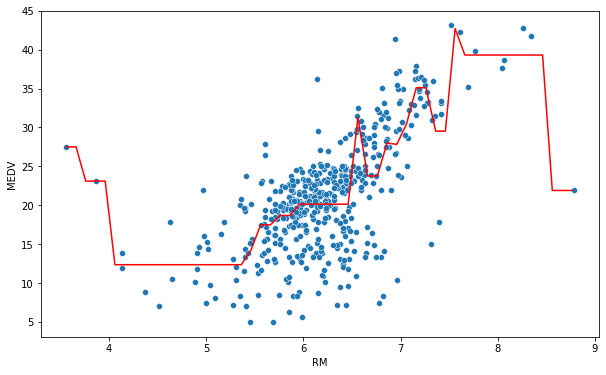

In [42]:
"""
Graficamos con  valores de X dentro del dominio de los datos de RM, 
esto para visualizar en orden como el algoritmo va haciendo la separación de los datos.
"""
X_grid = np.arange(min(df_procesado['RM']),max(df_procesado['RM']),0.1) 
X_grid = X_grid.reshape(len(X_grid),1)

plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'RM', y = 'MEDV')
plt.plot(X_grid, adr.predict(X_grid), color = 'r')
plt.show()

### MEDV vs LSTAT

In [43]:
#definimos los datos de prueba y entrenamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_procesado['LSTAT'].values.reshape(-1,1),
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)
        
#Entrenamos el modelo
adr.fit(X_train2, Y_train2)

#Obtengo los coeficientes y errores de la prediccion
R2_adr = adr.score(X_train2,Y_train2)  # R^2
Y_pred2_adr = adr.predict(X_test2) 
RMSE2_adr = np.sqrt(mean_squared_error(Y_test2, Y_pred2_adr)) # RMSE
MAE2_adr = mean_absolute_error(Y_test2, Y_pred2_adr) # MAE

In [44]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R2_adr}")
print()
print(f"El error RMSE: {RMSE2_adr}")
print()
print(f"El error MAE: {MAE2_adr}")

La precisión del modelo R^2: 0.7460882253784431

El error RMSE: 4.640543014906841

El error MAE: 3.281866533608318


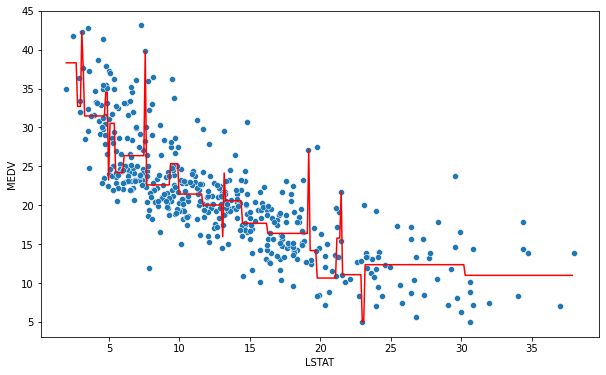

In [45]:
"""
Graficamos con  valores de X dentro del dominio de los datos de RM, 
esto para visualizar en orden como el algoritmo va haciendo la separación de los datos.
"""
X_grid = np.arange(min(df_procesado['LSTAT']),max(df_procesado['LSTAT']),0.1) 
X_grid = X_grid.reshape(len(X_grid),1)

plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'LSTAT', y = 'MEDV')
plt.plot(X_grid, adr.predict(X_grid), color = 'r')
plt.show()

### MEDV vs RN, LSTAT, INDUS

In [46]:
#definimos los datos de prueba y entrenamiento
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df_procesado[['RM','LSTAT','INDUS']].values, 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)
        
#Entrenamos el modelo
adr.fit(X_train3, Y_train3)

#Obtengo los coeficientes y errores de la prediccion
R3_adr = adr.score(X_train3,Y_train3)  #  R^2
Y_pred3_adr = adr.predict(X_test3) 
RMSE3_adr = np.sqrt(mean_squared_error(Y_test3, Y_pred3_adr)) #RMSE
MAE3_adr = mean_absolute_error(Y_test3, Y_pred3_adr) # MAE

In [47]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R3_adr}")
print()
print(f"El error RMSE: {RMSE3_adr}")
print()
print(f"El error MAE: {MAE3_adr}")

La precisión del modelo R^2: 0.880421790830694

El error RMSE: 3.486334952334809

El error MAE: 2.567808551679833


Información  obtenida:
- Notemos que para los entrenamientos de MEDV vs RM y MEDV vs LSTAT tiene mejor rendimiento ya que su $R^2$ es mayor, aunque el error $RMSE$ no varía demasiado de los anteriores modelos y el error $MAE$ incluso era más grande. Esto puede darnos un indicio de un ligero sobreajuste del modelo ya que el rendimiento a pesar de ser aceptable, al enfrentarlo con los datos de prueba, mostraba un error mayor.
- Con el entrenamiento de MEDV vs RN,LSTAT, INDUS obtenemos un resultado muy superior al de regresión polinomial, teniendo la mejor $R^2$, el $RMSE$ más pequeño y un $MAE$ cercano al resto de modelos. Esto nos puede hablar un ligero sobreajuste pero en menor grado que los otros dos entrenamientos de este mismo modelo.
- AL igual que en el algoritmo SVM, ya no tenemos información sobre coeficientes que describan la curva de la predicción. 

## 2.6 Bosques Aleatorios

Un ensamble es un grupo de algoritmos de Machine Learning que se entrenan sobre un conjunto de datos para obtener una predicción grupal sobre esos datos. Normalmente es mejor que la predicción de individual de un solo algoritmo.

Existen diferentes tipos de ensamble, el que nos interesa es el denominado "Bagging", donde, dado un conjunto de datos de entrenamiento, se realiza un remuestreo con reemplazo sobre ese conjunto, obteniendo así una cantidad de N muestras de tamaño igual a la muestra original (esta técnica de remuestreo se llama Bootstrap). Cada una de estas muestras será utilizada para entrenar cada uno de los algoritmos que conforman el ensamble y el estadístico a utilizar para determinar la predicción final de todos estos algoritmos será la Moda. 

El algoritmo de Bosques Aleatorios es un ensamble de varios Arboles de Decisión, donde cada arbol es entrenado con una muestra aleatoria obtenida del remuestreo de la original, de ahí el nombre de Bosques Aleatorios.

Para este algoritmo se realizarán las mismas pruebas que con los árboles de decisión, con el fin de comparar esos y ver que tanto mejoran, ya que han sido la mejor aproximación hasta el momento.

### MEDV vs RM

In [48]:
#definimos los datos de prueba y entrenamiento
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['RM'].values.reshape(-1,1), 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)
#Defino el algoritmo a utilizar
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 300, max_depth = 8) #n_setimators representa el número de árboles del ensamble
                                                               # max_depth es la profundidad de cada árbol
#Entrenamos el modelo
rfr.fit(X_train1, Y_train1)
#Obtengo los coeficientes y errores de la prediccion
R1_rfr = rfr.score(X_train1,Y_train1)  # R^2
Y_pred1_rfr = rfr.predict(X_test1) 
RMSE1_rfr = np.sqrt(mean_squared_error(Y_test1, Y_pred1_rfr)) #RMSE
MAE1_rfr = mean_absolute_error(Y_test1, Y_pred1_rfr) # MAE

In [49]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R1_rfr}")
print()
print(f"El error RMSE: {RMSE1_rfr}")
print()
print(f"El error MAE: {MAE1_rfr}")

La precisión del modelo R^2: 0.7483337683783539

El error RMSE: 6.433561972290977

El error MAE: 4.527545693253448


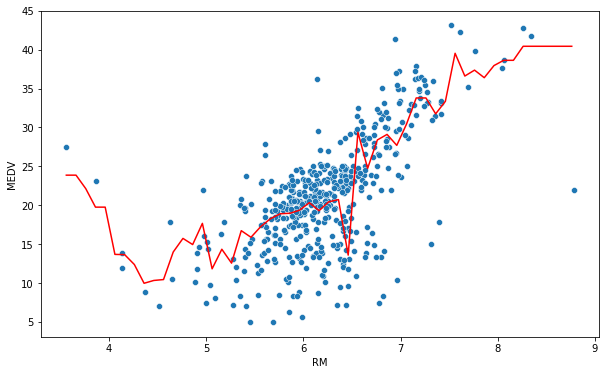

In [50]:
#Graficamos
X_grid = np.arange(min(df_procesado['RM']),max(df_procesado['RM']),0.1) 
X_grid = X_grid.reshape(-1,1)
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'RM', y = 'MEDV')
plt.plot(X_grid, rfr.predict(X_grid), color = 'r')
plt.show()

### MEDV vs LSTAT

In [51]:
#definimos los datos de prueba y entrenamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_procesado['LSTAT'].values.reshape(-1,1), 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)
#Defino el algoritmo a utilizar
rfr = RandomForestRegressor(n_estimators = 300, max_depth = 7) #n_setimators representa el número de árboles del ensamble
                                                               # max_depth es la profundidad de cada árbol
#Entrenamos el modelo
rfr.fit(X_train2, Y_train2)
#Obtengo los coeficientes y errores de la prediccion
R2_rfr = rfr.score(X_train2,Y_train2)  # R^2
Y_pred2_rfr = rfr.predict(X_test2) 
RMSE2_rfr = np.sqrt(mean_squared_error(Y_test2, Y_pred2_rfr)) #RMSE
MAE2_rfr = mean_absolute_error(Y_test2, Y_pred2_rfr) # MAE

In [52]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R2_rfr}")
print()
print(f"El error RMSE: {RMSE2_rfr}")
print()
print(f"El error MAE: {MAE2_rfr}")

La precisión del modelo R^2: 0.8290094137504055

El error RMSE: 4.484067733197812

El error MAE: 3.401514721984476


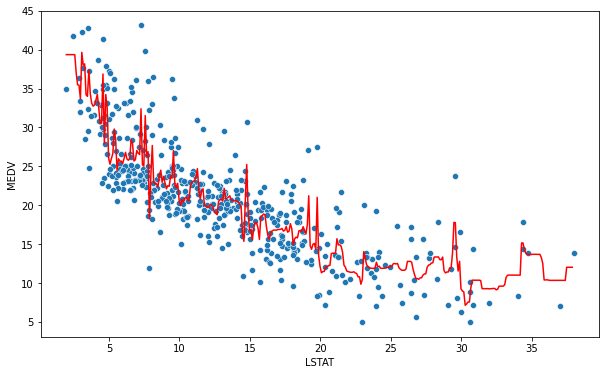

In [53]:
#Graficamos
X_grid = np.arange(min(df_procesado['LSTAT']),max(df_procesado['LSTAT']),0.1) 
X_grid = X_grid.reshape(-1,1)
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'LSTAT', y = 'MEDV')
plt.plot(X_grid, rfr.predict(X_grid), color = 'r')
plt.show()

### MEDV vs RN, LSTAT, INDUS

In [54]:
#definimos los datos de prueba y entrenamiento
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(df_procesado[['RM','LSTAT','INDUS']].values, 
                                                        df_procesado['MEDV'].values,
                                                        test_size = 0.20)
#Defino el algoritmo a utilizar
rfr = RandomForestRegressor(n_estimators = 300, max_depth = 9) #n_setimators representa el número de árboles del ensamble
                                                               # max_depth es la profundidad de cada árbol
#Entrenamos el modelo
rfr.fit(X_train3, Y_train3)
#Obtengo los coeficientes y errores de la prediccion
R3_rfr = rfr.score(X_train3,Y_train3)  # R^2
Y_pred3_rfr = rfr.predict(X_test3) 
RMSE3_rfr = np.sqrt(mean_squared_error(Y_test3, Y_pred3_rfr)) #RMSE
MAE3_rfr = mean_absolute_error(Y_test3, Y_pred3_rfr) # MAE

In [55]:
#Resultados del modelo
print(f"La precisión del modelo R^2: {R3_rfr}")
print()
print(f"El error RMSE: {RMSE3_rfr}")
print()
print(f"El error MAE: {MAE3_rfr}")

La precisión del modelo R^2: 0.9563594027472724

El error RMSE: 3.562956105382947

El error MAE: 2.5320878260816087


Información obtenida:
- En los tres entrenamientos se tienen los mejores rendimientos $R^2$ y los error $RMSE$ son los más bajos. Sin embargo los $MAE$ son más grandes que los modelos lineales y ligeramente más bajos que los de árbol de decisión, por lo que este ensamble resultaró mejor que un solo árboles de decisión.  

# 3. Resultados

A continuación tenemos las métricas obtenidas por cada prueba

In [62]:
# MEDV vs RM
RM_model = ['Linear Reg.', 'Polynomial Reg.', 'SVM Reg.', 'Decission Tree Reg.', 'Random Forests Reg.']
RM_datos = {
    r'$R^2$' : [R1_simple, R1_pol, R1_svr, R1_adr, R1_rfr],
    r'$RMSE$' : [RMSE1_simple, RMSE1_pol, RMSE1_svr, RMSE1_adr, RMSE1_rfr],
    r'$MAE$' : [MAE1_simple, MAE1_pol, MAE1_svr, MAE1_adr, MAE1_rfr]
}
RM_results =  pd.DataFrame(data = RM_datos, index = RM_model)
RM_results.style.background_gradient(cmap='YlOrRd')

,$R^2$,$RMSE$,$MAE$
Linear Reg.,0.392422,5.697278,2.091552
Polynomial Reg.,0.486129,5.702756,2.057968
SVM Reg.,0.361673,5.254585,1.984874
Decission Tree Reg.,0.619778,5.263881,4.004170
Random Forests Reg.,0.748334,6.433562,4.527546


In [63]:
# MEDV vs LSTAT
LSTAT_model = ['Linear Reg.', 'Polynomial Reg.', 'SVM Reg.', 'Decission Tree Reg.', 'Random Forests Reg.']
LSTAT_datos = {
    r'$R^2$' : [R2_simple, R2_pol, R2_svr, R2_adr, R2_rfr],
    r'$RMSE$' : [RMSE2_simple, RMSE2_pol, RMSE2_svr, RMSE2_adr, RMSE2_rfr],
    r'$MAE$' : [MAE2_simple, MAE2_pol, MAE2_svr, MAE2_adr, MAE2_rfr]
}
LSTAT_results =  pd.DataFrame(data = LSTAT_datos, index = LSTAT_model)
LSTAT_results.style.background_gradient(cmap='YlOrRd')

,$R^2$,$RMSE$,$MAE$
Linear Reg.,0.538280,6.244229,2.134839
Polynomial Reg.,0.658820,4.001157,1.744583
SVM Reg.,0.419021,5.271726,1.886978
Decission Tree Reg.,0.746088,4.640543,3.281867
Random Forests Reg.,0.829009,4.484068,3.401515


In [64]:
# MEDV vs RM,LSTAT,INDUS
RLI_model = ['Multilineal Reg.', 'Polynomial Reg.', 'SVM Reg.', 'Decission Tree Reg.', 'Random Forests Reg.']
RLI_datos = {
    r'$R^2$' : [R1_mul, R3_pol, R3_svr, R3_adr, R3_rfr],
    r'$RMSE$' : [RMSE1_mul, RMSE3_pol, RMSE3_svr, RMSE3_adr, RMSE3_rfr],
    r'$MAE$' : [MAE1_mul, MAE3_pol, MAE3_svr, MAE3_adr, MAE3_rfr]
}
RLI_results =  pd.DataFrame(data = RLI_datos, index = RLI_model)
RLI_results.style.background_gradient(cmap='YlOrRd')

,$R^2$,$RMSE$,$MAE$
Multilineal Reg.,0.687581,4.835201,1.942815
Polynomial Reg.,0.783246,3.370925,1.592824
SVM Reg.,0.602964,4.499930,1.749570
Decission Tree Reg.,0.880422,3.486335,2.567809
Random Forests Reg.,0.956359,3.562956,2.532088


Se obtiene la siguiente información:
- Para el entrenamiento de MEDV vs RM, tenemos el mejor rendimiento R^2 con el modelo de Bosques aleatorios, pero también tenemos los errores más altos de RMSE y MAE lo que puede implicar que hubo un sobreajuste en el modelo y que al momento de pasarle nuevos datos (los datos de Test) no realizó buenas predicciones. Del resto de modelos, a pesar de presentar errores bajos, el rendimiento del modelo es bajo para ser considerado como buen modelo.
- Para el entrenamiento de MEDV vs LSTAT se obtuvieron resultados similares aunque mejores al del anterior entrenamiento. Nuevamente el algoritmo de Bosques aleatorios tiene el mejor rendimiento y presenta los errores más altos, pero ya no son tan  grandes por lo que ya puede ser considerado como un buen modelo para predecir los precios de las casas.
- Para el entrenamiento MEDV vs RM,LSTAT,INDUS; se obtienen los mejores rendimientos en todos los modelos en comparación con los otros modelos, además de que también presentan los errores más bajos, incluyendo el modelo de Bosques aleatorios, manteniendose como el modelo más apropiado para estos datos.

Conclusiones:
- Para los modelos más simples e intuitivos como las regresiones lineales no se obtienen los mejores resultados, pero la ventaja de estos modelos es que ofrecen una ecuación explícita para predecir el comportamiento de una variable en términos de otra, hemos visto que tienen los errores más pequeños, no tienden a sobreajustarse y que no necesitan muchos parámetros para ser ajustados. Además de que son computacionalmente más baratos cuando no trabajan con demasiadas categorías a la vez, por lo que son buenas primeras aproximaciones para el estudio del comportamiento de los datos.
- Para modelos más complejos como SVM, árboles de decisión y bosques aleatorios, es menos intuitivo su funcionamiento, además de que estos arrojan directamente la predicción del resultado sin presentar una ecuación que refleje el comportamiento de los datos (esto no necesariamente es malo ya que el mundo real no siempre se adapta a una ecuación). Estos modelos además, cuentan con varios hiperparámetros que en ciertas ocasiones pueden que no sean muy intuitivos (aqui solo ocupamos algunos) y en caso de ajustarlos mal, tienden a sobreajustar el modelo . Aunque las ventajas es que presentan mejores rendimientos y pueden ocuparse en datasets más complejos.